In [105]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
import math
import csv
import copy
import os

In [106]:
LiDAR_data = './raw_data/2022-12-10-16-53-36_Velodyne-VLP-16-Data.csv'

os.path.exists(LiDAR_data)

True

In [130]:
with open(LiDAR_data, newline='') as f:
    rows = list(csv.reader(f, delimiter=',', quotechar='"'))
    pts_lidar = np.zeros(shape=(len(rows) - 1, 3))
    headers = rows.pop(0)
    for index, row in enumerate(rows[1:]):
        # print(index, row[0])
        pts_lidar[index] = row[0:3]

coords = o3d.geometry.TriangleMesh.create_coordinate_frame()
pcd_lidar = o3d.geometry.PointCloud()
pcd_lidar.points = o3d.utility.Vector3dVector(pts_lidar)

pcd_lidar_r = copy.deepcopy(pcd_lidar).translate((0, 0, 0))
pcd_lidar_r.rotate(pcd_lidar_r.get_rotation_matrix_from_xyz((-np.pi / 2, 0, 0)), center=(0, 0, 0))

pts_lidar_r = np.asarray(pcd_lidar_r.points)

In [108]:
x = pts_lidar_r[:,0]
y = pts_lidar_r[:,1]
z = pts_lidar_r[:,2]

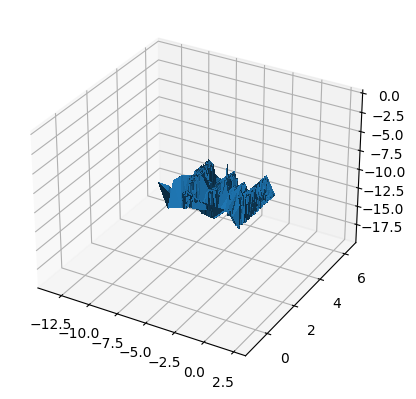

In [109]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_trisurf(x, y, z, linewidth=0, antialiased=False)
plt.show()

In [110]:
def appendSpherical_np(xyz):
    ptsnew = np.hstack((xyz, np.zeros(xyz.shape)))
    xy = xyz[:,0]**2 + xyz[:,1]**2
    ptsnew[:,3] = np.sqrt(xy + xyz[:,2]**2)
    ptsnew[:,4] = np.arctan2(np.sqrt(xy), xyz[:,2]) # for elevation angle defined from Z-axis down
    ptsnew[:,5] = np.arctan2(xyz[:,1], xyz[:,0])
    return ptsnew

In [111]:
def sph2cart(r, theta, phi):
    return [
         r * math.sin(theta) * math.cos(phi),
         r * math.sin(theta) * math.sin(phi),
         r * math.cos(theta)
    ]

In [125]:
pts_lidar_sph = appendSpherical_np(pts_lidar_r)[:,3:6]
print(pts_lidar_sph[:,1].max())

3.124138488960104


In [128]:
aux_array = (pts_lidar_sph[:,1:3]*100).astype(int)

In [129]:
# Get the shape of the target array
target_shape = tuple(aux_array.max(axis=0)[:2] + 1)

# Create a new array of zeros with the target shape
reformatted_lidar_pts = np.zeros(target_shape)

# Assign the values from the input array to the corresponding indices in the target array
reformatted_lidar_pts[aux_array[:, 0], aux_array[:, 1]] = pts_lidar_sph[:, 2]

# Reverse the rows of the target array to match the desired output format
reformatted_lidar_pts = reformatted_lidar_pts[::-1, :]

print(reformatted_lidar_pts)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
